<h1 align="center" ><div> Heart Disease Prediction</i></div></h1>
<h1 align="center" ><div> 

_Importing the necessary libraries_

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd

_First let's make sure the data is available._

In [9]:
ls *.csv

 HeartDisease.csv  'Muslihat GaffariTest.csv'  'Muslihat GaffariTrain.csv'


The __HeartDisease__ data has a number of Features ( = clinical measurements) that we hope can be used to predict whether or not a given subject has heart disease ( __target = 0 or 1__ ). 

The subjects consist of a control group ( __target = 0__ ) and an experimental group ( __target = 1__ ), and for all the subjects, the following features are observed. 

    Age     = age in years 
    Sex     = male (= 1) or female ( = 0 )
    chstpn  = chest pain type 
    restbp  = resting blood pressure (in mm Hg on admission to the hospital)
    chol    = serum cholestoral in mg/dl
    fbs     = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg = resting electrocardiographic results
    maxhr   = maximum heart rate achieved
    exang   = exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope   = the slope of the peak exercise ST segment
    target  =  diagnosis of heart disease (angiographic disease status)
              -- Value 0: < 50% diameter narrowing
              -- Value 1: > 50% diameter narrowing 

Below we load the data. 

In [11]:
HeartDiseaseDf = pd.read_csv('HeartDisease.csv')


## Data Exploratory

In [13]:
HeartDiseaseDf.head()

,Height,Weight,Sex,Age,Income,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
0,6.2,204,M,40,37410,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,6.1,197,F,49,37580,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,6.3,203,M,37,47760,ATA,130,283,0,ST,98,N,0.0,Up,0
3,5.8,182,F,48,82330,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,6.1,174,M,54,108380,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:

HeartDiseaseDf.tail()

,Height,Weight,Sex,Age,Income,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
913,5.8,208,M,45,72210,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,5.9,216,M,68,39050,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,5.9,209,M,57,71630,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,5.9,190,F,57,33940,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,5.9,172,M,38,79750,NAP,138,175,0,Normal,173,N,0.0,Up,0


_Next, we check for the shape of our data to know the overall structure of the dataset. We see that our dataset has 918 rows and 15 columns._

In [16]:
HeartDiseaseDf.shape

(918, 15)

_Before we perform descriptive statistics, we check for missing values. we see from the result below that our Data set has no missing values._

In [18]:
HeartDiseaseDf.isnull()

,Height,Weight,Sex,Age,Income,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
HeartDiseaseDf.isnull().sum()

Height     0
Weight     0
Sex        0
Age        0
Income     0
chstpn     0
restbp     0
chol       0
fbs        0
restecg    0
maxhr      0
exang      0
oldpeak    0
slope      0
target     0
dtype: int64

_Next, we explore our Data further by performing Descriptive Statistics. In the table below we have the five number summary which gives us insight about the distribution of our data._

In [24]:
HeartDiseaseDf.describe()

,Height,Weight,Age,Income,restbp,chol,fbs,maxhr,oldpeak,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,5.949237,186.114379,53.510893,68203.431373,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,0.314038,23.065290,9.432617,28107.888260,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,5.000000,111.000000,28.000000,20030.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,5.800000,172.000000,47.000000,43050.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,5.900000,189.000000,54.000000,68800.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,6.200000,203.000000,60.000000,93187.500000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,7.000000,238.000000,77.000000,119840.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


_Again we separate our dataset into two: Numerical and Non numerical feature for further analysis._

In [33]:
# Numerical Features 

HeartDiseaseDf.select_dtypes([int,float])

,Height,Weight,Age,Income,restbp,chol,fbs,maxhr,oldpeak,target
0,6.2,204,40,37410,140,289,0,172,0.0,0
1,6.1,197,49,37580,160,180,0,156,1.0,1
2,6.3,203,37,47760,130,283,0,98,0.0,0
3,5.8,182,48,82330,138,214,0,108,1.5,1
4,6.1,174,54,108380,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...
913,5.8,208,45,72210,110,264,0,132,1.2,1
914,5.9,216,68,39050,144,193,1,141,3.4,1
915,5.9,209,57,71630,130,131,0,115,1.2,1
916,5.9,190,57,33940,130,236,0,174,0.0,1


_Below is the data frame for the numeric features._

In [36]:
# DataFrame for Numerical Features

HDnumericDf = HeartDiseaseDf.select_dtypes([int,float])
HDnumericDf.head()

,Height,Weight,Age,Income,restbp,chol,fbs,maxhr,oldpeak,target
0,6.2,204,40,37410,140,289,0,172,0.0,0
1,6.1,197,49,37580,160,180,0,156,1.0,1
2,6.3,203,37,47760,130,283,0,98,0.0,0
3,5.8,182,48,82330,138,214,0,108,1.5,1
4,6.1,174,54,108380,150,195,0,122,0.0,0


_We will like to know the dimantionon of the HDnumericDf so we check its shape. From the output below we see that the HDnumericDf has 918 rows an 10 columns._

In [40]:
HDnumericDf.shape 

(918, 10)

We perform correlation analysis using the numeric features to see the relationship between the features and with target, the response.

In [43]:
#Correlation Analysis of Numeric Features.
matrix = HDnumericDf.corr()
print(matrix)

           Height    Weight       Age    Income    restbp      chol       fbs  \
Height   1.000000  0.617181  0.030595  0.067321  0.001965 -0.096971  0.063724   
Weight   0.617181  1.000000  0.138833  0.096347  0.051774 -0.207021  0.184350   
Age      0.030595  0.138833  1.000000  0.036975  0.254399 -0.095282  0.198039   
Income   0.067321  0.096347  0.036975  1.000000 -0.040976 -0.076022  0.064110   
restbp   0.001965  0.051774  0.254399 -0.040976  1.000000  0.100893  0.070193   
chol    -0.096971 -0.207021 -0.095282 -0.076022  0.100893  1.000000 -0.260974   
fbs      0.063724  0.184350  0.198039  0.064110  0.070193 -0.260974  1.000000   
maxhr   -0.102291 -0.263326 -0.382045 -0.082045 -0.112135  0.235792 -0.131438   
oldpeak  0.073357  0.256149  0.258612  0.033460  0.164803  0.050148  0.052698   
target   0.156291  0.583409  0.282039  0.045091  0.107589 -0.232741  0.267291   

            maxhr   oldpeak    target  
Height  -0.102291  0.073357  0.156291  
Weight  -0.263326  0.256149 

We then drop the target

In [46]:
X = HDnumericDf.drop('target', axis =1 )
y_1 = HDnumericDf.target

X.head()

,Height,Weight,Age,Income,restbp,chol,fbs,maxhr,oldpeak
0,6.2,204,40,37410,140,289,0,172,0.0
1,6.1,197,49,37580,160,180,0,156,1.0
2,6.3,203,37,47760,130,283,0,98,0.0
3,5.8,182,48,82330,138,214,0,108,1.5
4,6.1,174,54,108380,150,195,0,122,0.0


_Next, we check the variance threshold to see which features to drop. We observe from the below output that all the numeric features are good predictors of the response._

In [49]:
from sklearn.feature_selection import VarianceThreshold

p = 0.9  ## eliminate boolean if probability of either 1 or 0 exceeds p

sel = VarianceThreshold( threshold = p * (1-p) )
sel.fit(X)
sel.get_feature_names_out()

array(['Height', 'Weight', 'Age', 'Income', 'restbp', 'chol', 'fbs',
       'maxhr', 'oldpeak'], dtype=object)

_Now, we will look at the Non-numeric features_

In [53]:
HDNonNumericDf = HeartDiseaseDf.select_dtypes(exclude = [int,float])
HDNonNumericDf

,Sex,chstpn,restecg,exang,slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


_We assign numeric values to the non-numeric features for the purpose of analysis. We are using the One Hot Encoder._

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
#Here we print out the categories under each Non numeric feature

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder( dtype = int ) # We want integer 0 or 1
encoded = ohe.fit_transform(HeartDiseaseDf[ ['Sex','chstpn','restecg','exang','slope'] ] )
encoded
ohe.categories_



[array(['F', 'M'], dtype=object),
 array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object),
 array(['LVH', 'Normal', 'ST'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Down', 'Flat', 'Up'], dtype=object)]

_We then assign numeric values to each component and then concatenate with the numeric feature of the Data._

In [74]:
from sklearn.preprocessing import OneHotEncoder
categories = HeartDiseaseDf.select_dtypes(exclude = [int,float]).columns
categories

Index(['Sex', 'chstpn', 'restecg', 'exang', 'slope'], dtype='object')

In [76]:
ohe = OneHotEncoder( dtype = int ) # We want integer 0 or 1
HeartDiseaseDf_new = HeartDiseaseDf.copy()

for category in categories: 
    encoded = ohe.fit_transform( HeartDiseaseDf[ [category] ] )
    oheDf = pd.DataFrame( encoded.todense(), 
                          columns = ohe.categories_[0])

    HeartDiseaseDf_new = pd.concat([oheDf,HeartDiseaseDf_new], axis=1 )  
    HeartDiseaseDf_new.drop(category, axis=1, inplace=True)
HeartDiseaseDf_new.head()

,Down,Flat,Up,N,Y,LVH,Normal,ST,ASY,ATA,...,Height,Weight,Age,Income,restbp,chol,fbs,maxhr,oldpeak,target
0,0,0,1,1,0,0,1,0,0,1,...,6.2,204,40,37410,140,289,0,172,0.0,0
1,0,1,0,1,0,0,1,0,0,0,...,6.1,197,49,37580,160,180,0,156,1.0,1
2,0,0,1,1,0,0,0,1,0,1,...,6.3,203,37,47760,130,283,0,98,0.0,0
3,0,1,0,0,1,0,1,0,1,0,...,5.8,182,48,82330,138,214,0,108,1.5,1
4,0,0,1,1,0,0,1,0,0,0,...,6.1,174,54,108380,150,195,0,122,0.0,0


In [78]:
X = HeartDiseaseDf_new.drop('target',axis = 1)
y_1 = HeartDiseaseDf_new.target
X.head()


,Down,Flat,Up,N,Y,LVH,Normal,ST,ASY,ATA,...,M,Height,Weight,Age,Income,restbp,chol,fbs,maxhr,oldpeak
0,0,0,1,1,0,0,1,0,0,1,...,1,6.2,204,40,37410,140,289,0,172,0.0
1,0,1,0,1,0,0,1,0,0,0,...,0,6.1,197,49,37580,160,180,0,156,1.0
2,0,0,1,1,0,0,0,1,0,1,...,1,6.3,203,37,47760,130,283,0,98,0.0
3,0,1,0,0,1,0,1,0,1,0,...,0,5.8,182,48,82330,138,214,0,108,1.5
4,0,0,1,1,0,0,1,0,0,0,...,1,6.1,174,54,108380,150,195,0,122,0.0


In [80]:
X.corrwith(y_1)**2

Down       0.015013
Flat       0.307064
Up         0.387088
N          0.244315
Y          0.244315
LVH        0.000114
Normal     0.008387
ST         0.010512
ASY        0.266996
ATA        0.161543
NAP        0.045354
TA         0.003002
F          0.093297
M          0.093297
Height     0.024427
Weight     0.340367
Age        0.079546
Income     0.002033
restbp     0.011575
chol       0.054168
fbs        0.071445
maxhr      0.160337
oldpeak    0.163176
dtype: float64

 __Principal Components Analysis (PCA)__
 
 Before we perform Principal Component Analysis our numeric data, we first normalize or rescale our data.
 
 
 
 
 
 

In [83]:

from sklearn.preprocessing import StandardScaler
ScaledHeartDisease =HDnumericDf.target.values
Scaler = StandardScaler().fit_transform(X) # normalizing the features
Scaler



array([[-0.27144836, -1.00218103,  1.15067399, ..., -0.55134134,
         1.38292822, -0.83243239],
       [-0.27144836,  0.99782372, -0.86905588, ..., -0.55134134,
         0.75415714,  0.10566353],
       [-0.27144836, -1.00218103,  1.15067399, ..., -0.55134134,
        -1.52513802, -0.83243239],
       ...,
       [-0.27144836,  0.99782372, -0.86905588, ..., -0.55134134,
        -0.85706875,  0.29328271],
       [-0.27144836,  0.99782372, -0.86905588, ..., -0.55134134,
         1.4615246 , -0.83243239],
       [-0.27144836, -1.00218103,  1.15067399, ..., -0.55134134,
         1.42222641, -0.83243239]])

Now, we want to check if we have a mean of 0 and standard deniation of 1.

In [86]:
##Let's check whether the normalized data has a mean of zero and a standard deviation of one
np.mean (Scaler), np.std(Scaler)

(6.696883793514253e-17, 1.0)

In [88]:
HDnumericDf

,Height,Weight,Age,Income,restbp,chol,fbs,maxhr,oldpeak,target
0,6.2,204,40,37410,140,289,0,172,0.0,0
1,6.1,197,49,37580,160,180,0,156,1.0,1
2,6.3,203,37,47760,130,283,0,98,0.0,0
3,5.8,182,48,82330,138,214,0,108,1.5,1
4,6.1,174,54,108380,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...
913,5.8,208,45,72210,110,264,0,132,1.2,1
914,5.9,216,68,39050,144,193,1,141,3.4,1
915,5.9,209,57,71630,130,131,0,115,1.2,1
916,5.9,190,57,33940,130,236,0,174,0.0,1


__Principal Component Analysis (PCA)of at least One Component of the Data Set__

In [90]:
#Principal Components Analysis

from sklearn.decomposition import PCA
pca_HeartDisease = PCA(n_components=6)
principalComponents_HD = pca_HeartDisease.fit_transform(Scaler)
principalComponents_HD

array([[ 2.41505029, -2.33014325, -0.75398244, -1.31149623, -1.28080192,
        -0.57154182],
       [ 1.48194539,  1.44406272, -0.73796968, -0.11016752,  2.4517983 ,
        -0.09354414],
       [ 1.29016392, -2.04991186,  1.02119535,  0.64770371, -2.05231496,
        -1.86907924],
       ...,
       [-2.52721718,  0.06500249, -1.71879219, -0.11631313,  0.15147999,
        -0.23514661],
       [ 2.30102991,  2.06460453,  1.11783733, -1.16473114,  0.12983814,
        -1.37684774],
       [ 2.52287003, -1.87959431, -0.28671467, -0.41128529,  1.14440368,
         0.41628776]])

In [115]:
HDPCADf = pd.DataFrame(data = principalComponents_HD
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5','pc6'])
HDPCADf

,pc1,pc2,pc3,pc4,pc5,pc6
0,2.415050,-2.330143,-0.753982,-1.311496,-1.280802,-0.571542
1,1.481945,1.444063,-0.737970,-0.110168,2.451798,-0.093544
2,1.290164,-2.049912,1.021195,0.647704,-2.052315,-1.869079
3,-0.852949,2.902274,-2.214495,0.174338,-0.030215,-0.308018
4,1.466497,-1.684707,0.222971,0.314882,1.327539,0.427401
...,...,...,...,...,...,...
913,0.245064,-0.963627,-0.337915,-0.997671,1.931369,0.234654
914,-1.937649,-0.024678,-0.329001,0.257709,0.926774,0.814855
915,-2.527217,0.065002,-1.718792,-0.116313,0.151480,-0.235147
916,2.301030,2.064605,1.117837,-1.164731,0.129838,-1.376848


Now that we have our principal components, we will like to know how much variation is explained by the first few components. We see that the first five components explained about 55% of the total variation. This may suggest to as that almost all the numeric variables are important in fitting our model.

In [118]:
print('Explained variation per principal component: {}'.format(pca_HeartDisease.explained_variance_ratio_))


Explained variation per principal component: [0.21466705 0.10553521 0.08192896 0.06515692 0.06226885 0.05671356]


 __Clustering and homogeneity of (at least one representation) of the data__

In [122]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import homogeneity_score, completeness_score, rand_score 

In [123]:

clstr = SpectralClustering(n_clusters = 2, 
                           affinity = 'nearest_neighbors',
                           n_neighbors=20,
                           assign_labels='discretize')
preds = clstr.fit_predict( HDPCADf[['pc3']])

In [125]:

completeness_score(y_1,preds)

9.671124513529412e-05

In [130]:
from sklearn.metrics import homogeneity_score, completeness_score, rand_score  

homogeneity score = 0.00010


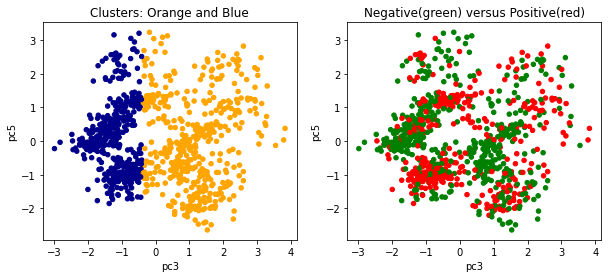

In [136]:

y = HDnumericDf["target"]

fig,ax = plt.subplots(1,2,figsize = (10,4));
clrs = [ ['orange','darkblue'][i] for i in preds]
HDPCADf[['pc3','pc5']].plot.scatter('pc3','pc5', color = clrs, ax = ax[0],
                      title = 'Clusters: Orange and Blue');
clrs = [ ['red','green'][i] for i in y]
HDPCADf[['pc3','pc5']].plot.scatter('pc3','pc5', color = clrs, ax = ax[1],
                      title = 'Negative(green) versus Positive(red)');
print('homogeneity score = %.5f' % homogeneity_score(y, preds))

Using Logistics regression , we aim to know which features are significant and by how much.

In [140]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y_1)
model.coef_[0]

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 9.63832616e-04,  1.34584701e-02, -1.57085898e-02, -1.11251191e-02,
        9.83883205e-03,  2.68956062e-03, -3.81392608e-03, -1.61921570e-04,
        1.05062773e-02, -6.79172888e-03, -4.77871720e-03, -2.22118193e-04,
       -7.13580920e-04, -5.72706103e-04, -1.00212524e-02,  5.18720651e-02,
       -4.96568150e-04, -7.13927910e-06, -1.74694459e-02, -2.26856601e-03,
        4.65466369e-03, -4.36927343e-02,  2.24207958e-02])

Now we use the MinMaxScaler approach to rescale the data

In [142]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler( feature_range = (0,1) )
ScaledX_1Array = sclr.fit_transform(X_1) 
ScaledX_1 = pd.DataFrame(ScaledX_1Array,
                              columns = X_1.columns,
                              index = X_1.index)
ScaledX_1.head()

NameError: name 'X_1' is not defined

In [146]:
model = LogisticRegression()
model.fit(ScaledX_1, y_1)
model.coef_[0]

array([ 0.06219462,  1.11734416, -1.17887198, -0.53435613,  0.53502293,
        0.06184274, -0.0538556 , -0.00732034,  1.18691748, -0.70547937,
       -0.42991019, -0.05086111,  0.70396852,  0.26514188, -2.05947085,
        1.14914607, -0.66437415,  1.70002961])

Feature: Down, Score: 0.06219
Feature: Flat, Score: 1.11734
Feature: Up, Score: -1.17887
Feature: N, Score: -0.53436
Feature: Y, Score: 0.53502
Feature: LVH, Score: 0.06184
Feature: Normal, Score: -0.05386
Feature: ST, Score: -0.00732
Feature: ASY, Score: 1.18692
Feature: ATA, Score: -0.70548
Feature: NAP, Score: -0.42991
Feature: TA, Score: -0.05086
Feature: Age, Score: 0.70397
Feature: restbp, Score: 0.26514
Feature: chol, Score: -2.05947
Feature: fbs, Score: 1.14915
Feature: maxhr, Score: -0.66437
Feature: oldpeak, Score: 1.70003


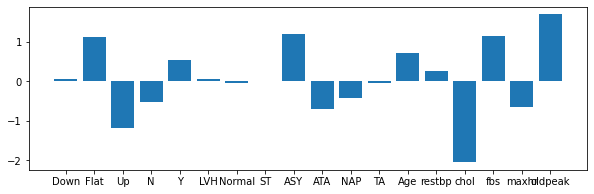

In [147]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_1.columns[i],v))
# plot feature importance
plt.figure(figsize=(10,3))
plt.bar(X_1.columns, importance);

X_1: Down, Score: -0.10822
X_1: Flat, Score: 1.17104
X_1: Up, Score: -1.06283
X_1: N, Score: -0.49924
X_1: Y, Score: 0.49922
X_1: LVH, Score: 0.10097
X_1: Normal, Score: -0.04540
X_1: ST, Score: -0.05559
X_1: ASY, Score: 1.18843
X_1: ATA, Score: -0.64996
X_1: NAP, Score: -0.44188
X_1: TA, Score: -0.09661
X_1: Age, Score: 0.12433
X_1: restbp, Score: 0.05699
X_1: chol, Score: -0.50966
X_1: fbs, Score: 0.49582
X_1: maxhr, Score: -0.15781
X_1: oldpeak, Score: 0.40582


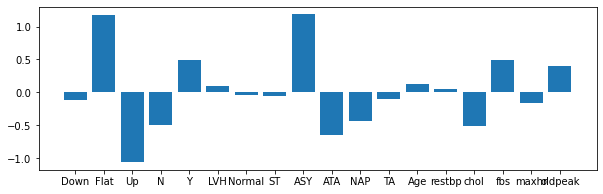

In [139]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_1.columns[i],v))
# plot feature importance
plt.figure(figsize=(10,3))
plt.bar(X_1.columns, importance);



# summary of  feature importance
importance = model.coef_[0]

for i,v in enumerate(importance):
    print('X_1: %s, Score: %.5f' % (X_1.columns[i],v))
# plot feature importance
plt.figure(figsize=(10,3))
plt.bar(X_1.columns, importance);

Now that it is clear which features are insignificant, we go ahead and take them out of the model

In [55]:
InsignificantColumns = ['Down','LVH','Normal','ST', 'TA','restbp']
ReducedFeaturesHD = X_1.drop(InsignificantColumns, axis = 1)
ReducedFeaturesHD.head()

,Flat,Up,N,Y,ASY,ATA,NAP,Age,chol,fbs,maxhr,oldpeak
0,0,1,1,0,0,1,0,-1.433140,0.825070,-0.551341,1.382928,-0.832432
1,1,0,1,0,0,0,1,-0.478484,-0.171961,-0.551341,0.754157,0.105664
2,0,1,1,0,0,1,0,-1.751359,0.770188,-0.551341,-1.525138,-0.832432
3,1,0,0,1,1,0,0,-0.584556,0.139040,-0.551341,-1.132156,0.574711
4,0,1,1,0,0,0,1,0.051881,-0.034755,-0.551341,-0.581981,-0.832432


In [122]:
model = LogisticRegression()
model.fit(ReducedFeaturesHD, y_1)
model.coef_[0]

array([ 1.25253355, -0.98188574, -0.50262817,  0.5025538 ,  1.23680148,
       -0.60488047, -0.39574031,  0.15213713, -0.4884079 ,  0.49642355,
       -0.14583547,  0.40683439])

In [123]:
# summary of feature importance

importance = model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (ReducedFeaturesHD.columns[i],v))
    


Feature: Flat, Score: 1.25253
Feature: Up, Score: -0.98189
Feature: N, Score: -0.50263
Feature: Y, Score: 0.50255
Feature: ASY, Score: 1.23680
Feature: ATA, Score: -0.60488
Feature: NAP, Score: -0.39574
Feature: Age, Score: 0.15214
Feature: chol, Score: -0.48841
Feature: fbs, Score: 0.49642
Feature: maxhr, Score: -0.14584
Feature: oldpeak, Score: 0.40683


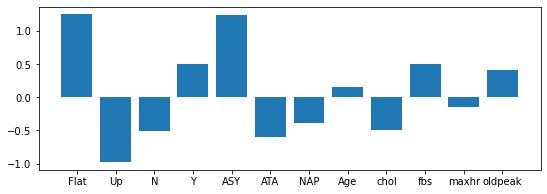

In [60]:
# plot feature importance
plt.figure(figsize=(9,3))
plt.bar(ReducedFeaturesHD.columns, importance);


Next, we want to see whether we can use our representation to produce a good nearest neighbor classifier

In [62]:
from sklearn.model_selection import train_test_split 
ReducedFeaturesHDtrain, ReducedFeaturesHDtest, y_1train, y_1test = train_test_split(ReducedFeaturesHD,y_1, test_size = 0.2 )

In [125]:
from sklearn.neighbors import KNeighborsClassifier
kNNclf = KNeighborsClassifier(n_neighbors = 21) 
kNNclf.fit(ReducedFeaturesHDtrain, y_1train)
y_1pred = kNNclf.predict(ReducedFeaturesHDtest)
y_1prob = model.predict_proba(ReducedFeaturesHDtest)[:,1]
kNNclf.score(ReducedFeaturesHDtest, y_1test)

0.8478260869565217

In [126]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(kNNclf, ReducedFeaturesHD, y_1, cv=5)
scores

array([0.81521739, 0.88043478, 0.84782609, 0.83606557, 0.76502732])

In [66]:
scores.mean()  # Must improve to over 80% average accuracy

0.8289142314088858

Now we have an accuracy score of 83% which is above the minimum score of 80%

In [67]:
actpredDf = pd.DataFrame( {'actual':y_1test.values, 'predicted':y_1pred, 'prob':y_1prob} )
actpredDf.head()

,actual,predicted,prob
0,1,0,0.124328
1,1,1,0.783715
2,1,1,0.913412
3,0,0,0.468257
4,0,0,0.040169


In [68]:
confusion_matrix = pd.crosstab(actpredDf['actual'], actpredDf['predicted'], 
                               rownames=['Actual'], colnames=['Predicted'], margins = True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,69,17,86
1,11,87,98
All,80,104,184


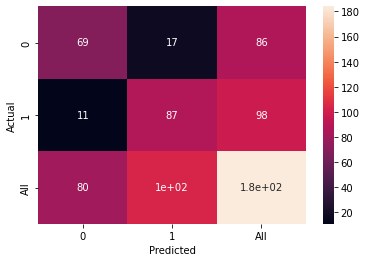

In [69]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True);

__ROC-AUC from estimator__

ROC curve is a graph that shows the performance of a classification model at all possible thresholds

In [72]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [73]:
fpr, tpr, lvls = roc_curve(actpredDf.actual, actpredDf.predicted)
fpr

array([0.        , 0.19767442, 1.        ])

In [74]:
fpr, tpr, lvls = roc_curve(actpredDf.actual, actpredDf.prob)
fpr

array([0.        , 0.        , 0.        , 0.01162791, 0.01162791,
       0.02325581, 0.02325581, 0.04651163, 0.04651163, 0.05813953,
       0.05813953, 0.06976744, 0.06976744, 0.08139535, 0.08139535,
       0.10465116, 0.10465116, 0.11627907, 0.11627907, 0.12790698,
       0.12790698, 0.1627907 , 0.1627907 , 0.20930233, 0.20930233,
       0.26744186, 0.26744186, 0.3372093 , 0.3372093 , 0.37209302,
       0.37209302, 0.44186047, 0.44186047, 0.46511628, 0.46511628,
       0.52325581, 0.52325581, 0.74418605, 0.74418605, 1.        ])

In [75]:
auc(fpr,tpr)

0.915875652586616

In [ ]:
Features = df.drop('target', axis=1)
Response = df.target

Features.head()

In [ ]:
scores.mean() 

__ROC-AUC from estimator__

Now we plot a ROC-AUC curve to check the performance the model at all possible thresholds.

In [83]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [82]:
fpr, tpr, lvls = roc_curve(actpredDf.actual, actpredDf.predicted)
fpr

array([0.        , 0.19767442, 1.        ])

In [81]:
fpr, tpr, lvls = roc_curve(actpredDf.actual, actpredDf.prob)
fpr

array([0.        , 0.        , 0.        , 0.01162791, 0.01162791,
       0.02325581, 0.02325581, 0.04651163, 0.04651163, 0.05813953,
       0.05813953, 0.06976744, 0.06976744, 0.08139535, 0.08139535,
       0.10465116, 0.10465116, 0.11627907, 0.11627907, 0.12790698,
       0.12790698, 0.1627907 , 0.1627907 , 0.20930233, 0.20930233,
       0.26744186, 0.26744186, 0.3372093 , 0.3372093 , 0.37209302,
       0.37209302, 0.44186047, 0.44186047, 0.46511628, 0.46511628,
       0.52325581, 0.52325581, 0.74418605, 0.74418605, 1.        ])

In [80]:
auc(fpr,tpr)

0.915875652586616

The AUC value for the ReducedFeatures was found to be 0.92 which is close to 1. which indicates that it has the highest area under the curve and it indicates that the model with ReducedFeatures is best at correctly classifying the features into categories as compared to that of the actual features (0.85)

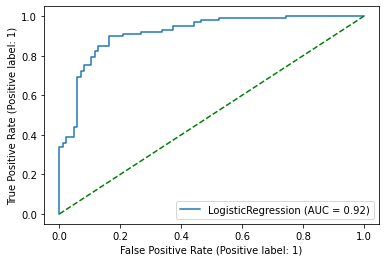

In [79]:
RocCurveDisplay.from_estimator(model, ReducedFeaturesHDtest,y_1test)
plt.plot(np.arange(0,11)/10, np.arange(0,11)/10, 'g--');

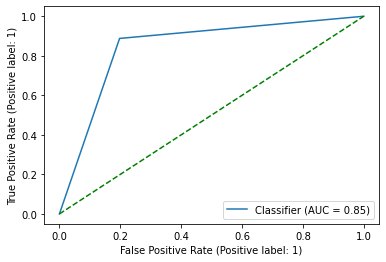

In [78]:
RocCurveDisplay.from_predictions(actpredDf.actual, actpredDf.predicted)
plt.plot(np.arange(0,11)/10, np.arange(0,11)/10, 'g--');